<a href="https://colab.research.google.com/github/Midhilesh29/pytorch-learning/blob/master/MNIST%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

**Defining the network architecture**

In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.feature = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5), #input (32,32,1), #output (28,28,6) formula [(32-5)/1]+1=28
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2), #input (28,28,6), output (14,14,6)

        nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5), #input (14,14,6) output (10,10,16) formula [(14-5)]+1 = 10
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) #input (10,10,16) output (5,5,16)
    )
    self.classifier = nn.Sequential(
        nn.Linear(16*5*5,512), #input(5*5*16) output 512
        nn.ReLU(),

        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,10)
    )
  def forward(self,x):
    x = self.feature(x)
    x = x.view(x.shape[0],-1)
    x = self.classifier(x)
    return x

**Dataset and Data Loaders**

In [ ]:
Transform = transforms.Compose([ 
                                transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307),(0.3081))
                                ])

In [ ]:
train_dataset = datasets.MNIST("/content",train=True,transform=Transform,download=True)
test_dataset = datasets.MNIST("/content",train=False,transform=Transform,download=True)

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw




Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32)

**Training and testing functions**

In [ ]:
def train(criterion,optimizer):
  total_loss=0
  total_accuracy=0
  for image,label in train_loader:
    image = image.to('cuda')
    label = label.to('cuda')

    logits = Model(image)
    loss = criterion(logits,label) #predicted, true label
    total_loss+=loss.item()

    prob = nn.functional.softmax(logits,dim=1)
    y_pred = prob.argmax(1)
    accuracy = torch.sum(y_pred==label)
    total_accuracy+=accuracy.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  return total_loss/len(train_loader), total_accuracy/len(train_loader.dataset)

In [ ]:
def test(criterion):
  total_loss=0
  total_accuracy=0
  for image,label in test_loader:
    image = image.to('cuda')
    label = label.to('cuda')

    logits = Model(image)
    loss = criterion(logits, label)
    total_loss+=loss.item()

    prob = nn.functional.softmax(logits,dim=1)
    y_pred = prob.argmax(1)
    accuracy = torch.sum(y_pred==label)
    total_accuracy+=accuracy.item()
  return total_loss/len(test_loader), total_accuracy/len(test_loader.dataset)

In [ ]:
epochs=10

In [ ]:
Model = LeNet().to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(),lr=1e-2)

In [ ]:
epoch_train_accuracy = []
epoch_train_loss = []
epoch_test_accuracy = []
epoch_test_loss = []

t1 = time.time()
for epoch in range(epochs):
  train_loss, train_accuracy = train(criterion,optimizer)
  test_loss, test_accuracy = test(criterion)

  epoch_train_accuracy.append(train_accuracy)
  epoch_train_loss.append(train_loss)
  epoch_test_accuracy.append(test_accuracy)
  epoch_test_loss.append(test_loss)

  print(f"Epoch: {epoch} | TrainLoss: {train_loss} | TrainAccuracy: {train_accuracy}| TestLoss: {test_loss}| TestAccuracy: {test_accuracy}")
t2 = time.time()

Epoch: 0 | TrainLoss: 0.5651836885372797 | TrainAccuracy: 0.8357833333333333| TestLoss: 0.15887690080811803| TestAccuracy: 0.9503
Epoch: 1 | TrainLoss: 0.11615920922358831 | TrainAccuracy: 0.9647| TestLoss: 0.07200382354731757| TestAccuracy: 0.9778
Epoch: 2 | TrainLoss: 0.07985885046521822 | TrainAccuracy: 0.9751166666666666| TestLoss: 0.07692109407803502| TestAccuracy: 0.9753
Epoch: 3 | TrainLoss: 0.061475893531243005 | TrainAccuracy: 0.9801| TestLoss: 0.056642333420511254| TestAccuracy: 0.9811
Epoch: 4 | TrainLoss: 0.05004027292728424 | TrainAccuracy: 0.9841833333333333| TestLoss: 0.04889549043612739| TestAccuracy: 0.984
Epoch: 5 | TrainLoss: 0.04197244761784871 | TrainAccuracy: 0.98675| TestLoss: 0.059360992579985734| TestAccuracy: 0.9798
Epoch: 6 | TrainLoss: 0.03611320384740829 | TrainAccuracy: 0.9884333333333334| TestLoss: 0.04457566503899547| TestAccuracy: 0.9854
Epoch: 7 | TrainLoss: 0.029779150819778444 | TrainAccuracy: 0.99065| TestLoss: 0.03656875066006907| TestAccuracy: 0.9

In [ ]:
t2-t1

207.96572971343994

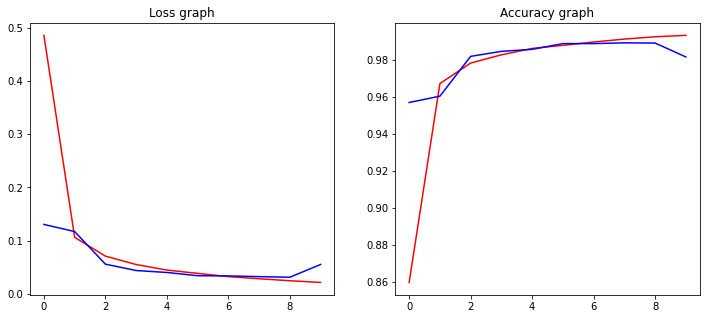

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Loss graph")
plt.plot(epoch_train_loss,'r')
plt.plot(epoch_test_loss,'b')

plt.subplot(122)
plt.title("Accuracy graph")
plt.plot(epoch_train_accuracy,'r')
plt.plot(epoch_test_accuracy,'b')

plt.show()

In [ ]:
Model = Model.eval()

In [ ]:
infer_loader = DataLoader(test_dataset,batch_size=4,shuffle=True)

Predicted class 2 with probability 0.9999165534973145


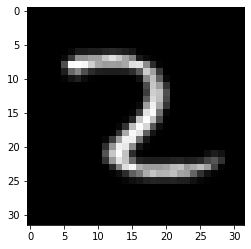



Predicted class 1 with probability 0.9999769926071167


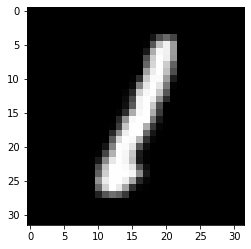



Predicted class 5 with probability 0.9993232488632202


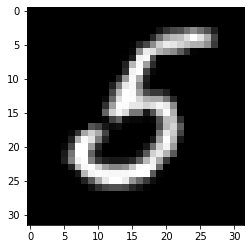



Predicted class 5 with probability 0.999998927116394


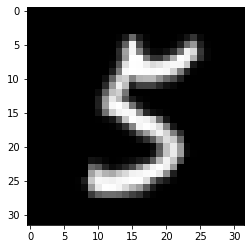

In [ ]:
for image,label in infer_loader:
  image = image.to('cuda')
  label = label.to('cuda')

  logit = Model(image)
  prob = nn.functional.softmax(logit,dim=1)
  p,y_pred = prob.max(1)

  for i in range(4):
    print(f"Predicted class {y_pred[i]} with probability {p[i]}")
    plt.imshow(image[i,:,:,:].cpu().view(32,32),cmap="gray")
    plt.show()
    print("\n")
  break

graph(%self : __torch__.LeNet,
      %x.1 : Tensor):
  %12 : int = prim::Constant[value=-1]() # <ipython-input-2-f8fa9b3fad85>:23:26
  %8 : int = prim::Constant[value=0]() # <ipython-input-2-f8fa9b3fad85>:23:23
  %2 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="feature"](%self)
  %x.3 : Tensor = prim::CallMethod[name="forward"](%2, %x.1) # <ipython-input-2-f8fa9b3fad85>:22:8
  %7 : int[] = prim::shape(%x.3)
  %9 : int = aten::__getitem__(%7, %8) # <ipython-input-2-f8fa9b3fad85>:23:15
  %13 : int[] = prim::ListConstruct(%9, %12)
  %x.6 : Tensor = aten::view(%x.3, %13) # <ipython-input-2-f8fa9b3fad85>:23:8
  %15 : __torch__.torch.nn.modules.container.___torch_mangle_9.Sequential = prim::GetAttr[name="classifier"](%self)
  %x.8 : Tensor = prim::CallMethod[name="forward"](%15, %x.6) # <ipython-input-2-f8fa9b3fad85>:24:8
  return (%x.8)